# EE 399
### Ting Jones
### 4/24/23
### HW 3

## Part 1

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from numpy import linalg 
from sklearn.datasets import fetch_openml

In [2]:
## Problem A
# Load the MNIST data
mnist = fetch_openml('mnist_784', parser="auto")
y = mnist.target
X = mnist.data / 255.0  # Scale the data to [0, 1]

# changing format of MNIST dataset so that each image is a column vector
X = X.to_numpy().T
print(X.shape)

(784, 70000)


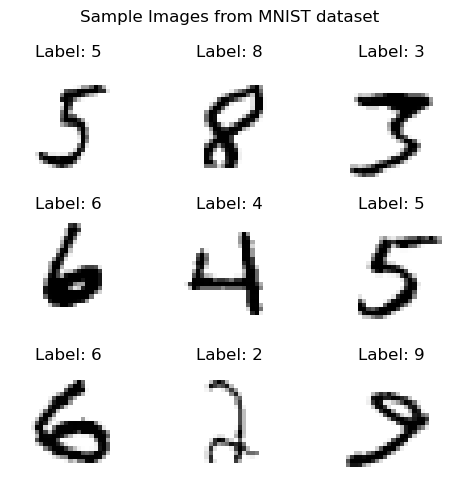

In [4]:
import random
# view random sample images in grayscale
fig = plt.figure(figsize=(5,5))
for i in range(9):
    ax = fig.add_subplot(3, 3, i+1)
    image_sel = random.randrange(0, X.shape[1])
    ax.imshow(X[:, image_sel].reshape(28, 28), cmap="binary")
    plt.title("Label: " + str(y[image_sel]))
    plt.axis('off')
plt.suptitle("Sample Images from MNIST dataset")
plt.tight_layout()

### Problem 1

In [5]:
rand_num = random.sample(range(X.shape[1]), 4000)
sample_x = X[:, rand_num]
sample_y = y[rand_num]
print(sample_x.shape)

(784, 4000)


In [6]:
# get top six principle components
u, s, vt = np.linalg.svd(sample_x, full_matrices=False)

### Problem 2

2


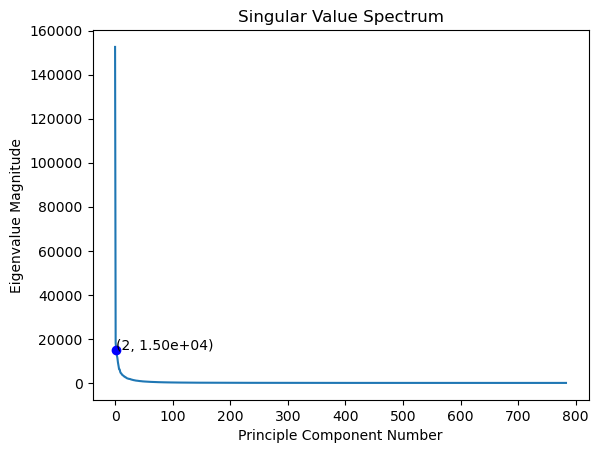

In [7]:
## UNSURE

# get rank of random sample
# r = np.linalg.matrix_rank(rand_sample)
# print(r)

eigval = s**2
thres = 0.1 * eigval[0]
r = np.sum(eigval > thres)
print(r)

fig = plt.figure()
plt.plot(np.arange(0, rand_sample.shape[0]), eigval)
plt.xlabel("Principle Component Number")
plt.ylabel("Eigenvalue Magnitude")
# plt.yscale('log')
plt.annotate('(%s, %s)' % (r, '{:.2e}'.format(eigval[r])), xy=(r, eigval[r]))
plt.plot(r, eigval[r], 'bo')
plt.title("Singular Value Spectrum")
plt.show()

642


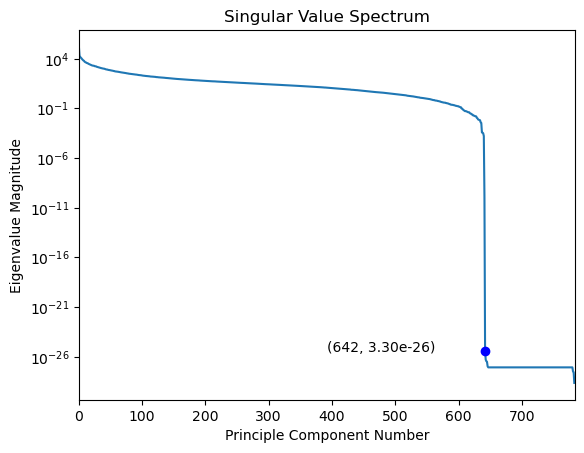

In [8]:
# get rank of random sample
r = np.linalg.matrix_rank(sample_x)
print(r)

eigval = s**2

fig = plt.figure()
plt.plot(np.arange(0, sample_x.shape[0]), eigval)
plt.xlim(0, sample_x.shape[0])
plt.xlabel("Principle Component Number")
plt.ylabel("Eigenvalue Magnitude")
plt.yscale('log')
plt.annotate('(%s, %s)' % (r, '{:.2e}'.format(eigval[r])), xy=(r-250, eigval[r]))
plt.plot(r, eigval[r], 'bo')
plt.title("Singular Value Spectrum")
plt.show()

### Problem 3

### Problem 4

In [10]:
sample_y = np.array(sample_y, dtype='i4')

In [9]:
# Projecting onto three V-modes, 0, 3, 5
# vt is V.T, and therefore each mode in vt is found by its rows. Transpose again to make them columns
proj_matrix = vt[[0, 3, 5], :].T
print(sample_x.shape, proj_matrix.shape)
proj = np.dot(sample_x, proj_matrix)
print(proj.shape)


(784, 4000) (4000, 3)
(784, 3)


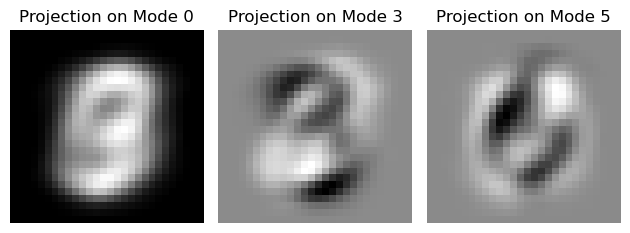

In [19]:
fig = plt.figure()
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1)
    vs = [0, 3, 5]
    plt.imshow(proj[:, i].reshape(28, 28), cmap="binary")
    plt.title("Projection on Mode " + str(vs[i]))
    plt.axis('off')
plt.tight_layout()


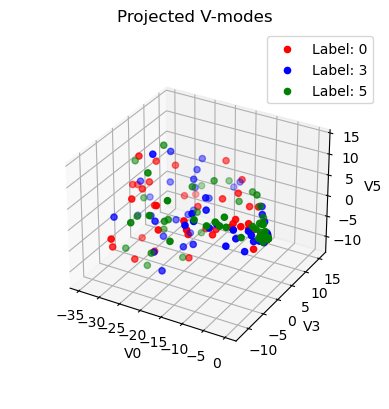

In [27]:
# # Transpose projection
proj = proj.T

# Create the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# somehow split the actual labels
ax.scatter(proj[0, :][sample_y[:784] == 0], proj[1, :][sample_y[:784] == 0], proj[2, :][sample_y[:784] == 0], c="red", label="Label: 0", s=20)
ax.scatter(proj[0, :][sample_y[:784] == 3], proj[1, :][sample_y[:784] == 3], proj[2, :][sample_y[:784] == 3], c="blue", label="Label: 3", s=20)
ax.scatter(proj[0, :][sample_y[:784] == 5], proj[1, :][sample_y[:784] == 5], proj[2, :][sample_y[:784] == 5], c="green", label="Label: 5", s=20)


# takes y, makes a boolean out of it depending on looking at current label

# Set the labels and limits of the plot
ax.set_xlabel('V0')
ax.set_ylabel('V3')
ax.set_zlabel('V5')
ax.set_box_aspect(aspect=None, zoom=0.8)

ax.legend()

plt.title("Projected V-modes")
plt.show()

## Part 2

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets

# for label = 0
sample_y_0 = np.where(sample_y == 0, sample_y, np.zeros(4000))
print(where_0)
sample_x_0 = sample_x[where_0]

X_train, X_test, y_train, y_test = train_test_split(sample_x_0, sample_y_0, test_size=0.2)

# Create a Support Vector Machine (SVM) classifier
clf = SVC()

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier on the test set
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
# for label = 3
sample_y_3 = sample_y == 3
sample_x_3 = sample_x[sample_y_3]


X_train, X_test, y_train, y_test = train_test_split(sample_x_0, sample_y_0, test_size=0.2)

# Create a Support Vector Machine (SVM) classifier
clf = SVC()

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier on the test set
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")